In [4]:
import pandas as pd
from sklearn.metrics import mean_absolute_error


import numpy as np 
import matplotlib.pyplot as plt 
from numpy.fft import fft, fftshift 
from numpy import hamming
import matplotlib.pyplot as plt 

In [5]:
url = 'https://raw.githubusercontent.com/kmkarakaya/ML_tutorials/master/data/Min-Max%20Daily%20Analyse.csv'
df = pd.read_csv(url, sep=';')
df.head()

,Date,Min,Max
0,6.2.2020,11.53,14.48
1,7.2.2020,9.13,14.56
2,8.2.2020,12.00,12.25
3,9.2.2020,11.96,12.00
4,10.2.2020,11.94,14.89


In [6]:
df['Range'] = df['Max']-df['Min']
df.head()

,Date,Min,Max,Range
0,6.2.2020,11.53,14.48,2.95
1,7.2.2020,9.13,14.56,5.43
2,8.2.2020,12.00,12.25,0.25
3,9.2.2020,11.96,12.00,0.04
4,10.2.2020,11.94,14.89,2.95


In [36]:
import datetime 
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df['Day'] = [ day_name[i] for i in pd.to_datetime(df['Date']).dt.dayofweek]
# df['Date2'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'],  dayfirst = True)
df = df.sort_values(by=['ds'])
df= df[['Date','Day','Min','Max','Range']]
df.head()

,Date,Day,Min,Max,Range
0,2020-02-06,Tuesday,11.53,14.48,2.95
1,2020-02-07,Thursday,9.13,14.56,5.43
2,2020-02-08,Sunday,12.00,12.25,0.25
3,2020-02-09,Wednesday,11.96,12.00,0.04
4,2020-02-10,Friday,11.94,14.89,2.95


In [37]:
len(df['Date'])
# df.describe()

90

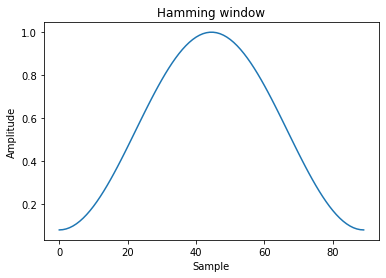

In [38]:
window = np.hamming(len(df['Date']))
  
plt.plot(window) 
plt.title("Hamming window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 

<AxesSubplot:xlabel='Date'>

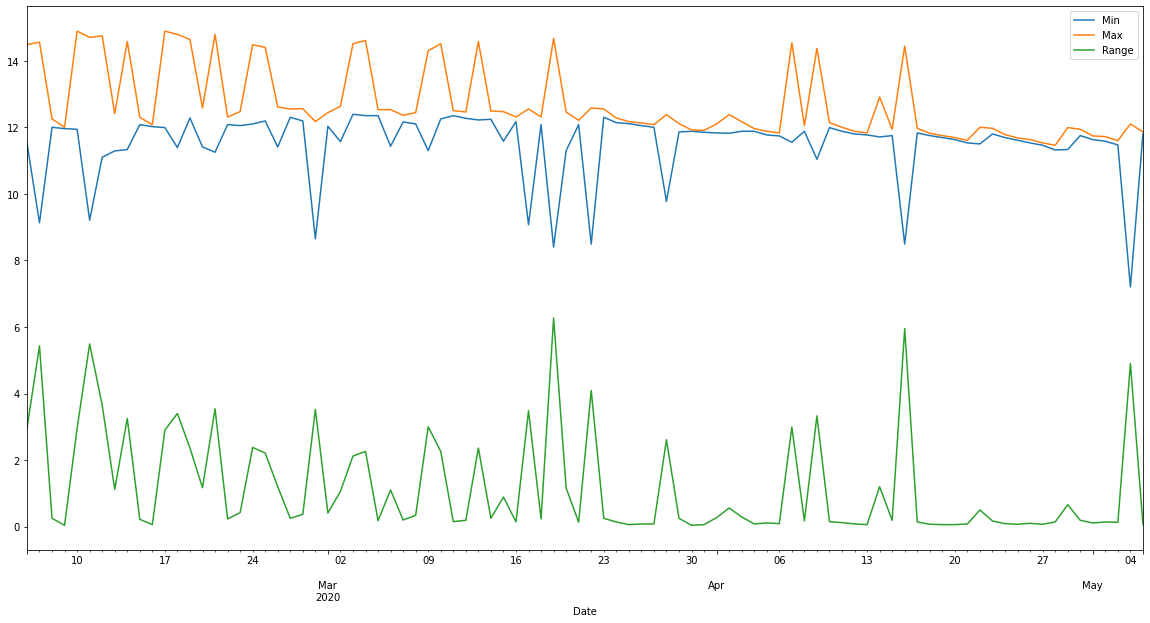

In [39]:
# df['ds'] = pd.to_datetime(df['Day'],  dayfirst = True)
df.plot(x='Date',   figsize=(20, 10))

In [11]:
min(df['Date'])

'1.3.2020'

In [12]:
max(df['Date'])
df['Date'].head(20)

0      6.2.2020
1      7.2.2020
2      8.2.2020
3      9.2.2020
4     10.2.2020
5     11.2.2020
6     12.2.2020
7     13.2.2020
8     14.2.2020
9     15.2.2020
10    16.2.2020
11    17.2.2020
12    18.2.2020
13    19.2.2020
14    20.2.2020
15    21.2.2020
16    22.2.2020
17    23.2.2020
18    24.2.2020
19    25.2.2020
Name: Date, dtype: object

In [13]:
max(df['Date'])

'9.4.2020'

In [14]:
date_max = max(df['Date'])
date_min = min(df['Date'])

date_max, date_min

('9.4.2020', '1.3.2020')

In [15]:
from datetime import datetime
date_format = "%d.%m.%Y"
a = datetime.strptime(date_min, date_format)
b = datetime.strptime(date_max, date_format)
delta = b - a
delta_days = delta.days 
delta_days

39

In [16]:
window

array([0.08      , 0.08114585, 0.08457769, 0.09027841, 0.09821963,
       0.10836178, 0.12065432, 0.13503603, 0.15143524, 0.16977027,
       0.18994976, 0.21187318, 0.23543132, 0.2605068 , 0.2869747 ,
       0.31470316, 0.34355404, 0.3733836 , 0.40404324, 0.4353802 ,
       0.46723838, 0.49945905, 0.5318817 , 0.56434479, 0.59668659,
       0.62874599, 0.66036326, 0.69138088, 0.72164433, 0.75100284,
       0.77931015, 0.80642522, 0.83221297, 0.85654494, 0.87929989,
       0.90036447, 0.91963373, 0.93701168, 0.95241173, 0.96575717,
       0.97698151, 0.98602883, 0.99285405, 0.99742318, 0.99971345,
       0.99971345, 0.99742318, 0.99285405, 0.98602883, 0.97698151,
       0.96575717, 0.95241173, 0.93701168, 0.91963373, 0.90036447,
       0.87929989, 0.85654494, 0.83221297, 0.80642522, 0.77931015,
       0.75100284, 0.72164433, 0.69138088, 0.66036326, 0.62874599,
       0.59668659, 0.56434479, 0.5318817 , 0.49945905, 0.46723838,
       0.4353802 , 0.40404324, 0.3733836 , 0.34355404, 0.31470

# RFTT

In [17]:
range_rftt = np.fft.rfft(df['Range'])
range_rftt

array([108.58       +0.j        ,  11.22728252-25.62366377j,
        11.13070027-12.94992955j,   3.19195209-24.53570826j,
        17.11513197 -0.73485241j,   0.23990816 -6.76600272j,
         7.18775939 +5.23731009j,   0.55381883 -7.55103213j,
        -0.1522151  -1.09801913j,   5.06215515-12.63677293j,
        -1.66198901+22.51912791j,  -5.67098276 +3.87232669j,
        -5.37371998 +2.86777042j,  15.87659869+10.78111352j,
        18.0060838 +16.95855962j,   2.21       +2.63271723j,
         6.54938913 -5.40867914j,   5.37544111 -1.68938045j,
         3.07553442-10.12032391j,   5.42756851+13.20725876j,
         3.79907326-14.5621944j , -10.37657587 -9.11176055j,
         2.62877606 -6.19680427j,   7.48567895 -2.96430413j,
         4.62775271 -9.52041179j,  -7.59141216-21.12288435j,
       -12.78716607-24.21833849j,  -9.09215515 -0.28630395j,
         4.19999606 -4.73182288j, -29.33777785 +1.93714995j,
         8.35       -6.58179307j,  -1.61266833 -7.53274133j,
         9.34288288 -9.6

## Spectrum

In [23]:
#N  number of samples in the series
N = len(df['Range']) 
# T - total amount put into the FFT
T = delta_days

spectrum = abs(range_rftt)**2 * T * N**2
spectrum


# TO consider: use several stretches of time and average their FFTs to get a reasonable spectrum estimate

array([3.72433982e+09, 2.47230927e+08, 9.21142804e+07, 1.93390675e+08,
       9.27064624e+07, 1.44797026e+07, 2.49855741e+07, 1.81089048e+07,
       3.88182798e+05, 5.85405172e+07, 1.61068985e+08, 1.48962517e+07,
       1.17201976e+07, 1.16345589e+08, 1.93271347e+08, 3.73245327e+06,
       2.27916505e+07, 1.00296270e+07, 3.53428503e+07, 6.44089091e+07,
       7.15483374e+07, 6.02413425e+07, 1.43136965e+07, 2.04774241e+07,
       3.53979646e+07, 1.59152246e+08, 2.36937489e+08, 2.61404897e+07,
       1.26455132e+07, 2.73082206e+08, 3.57101257e+07, 1.87464193e+07,
       5.71390731e+07, 6.44823081e+07, 2.46485497e+07, 5.03822496e+07,
       1.58504857e+08, 4.15561258e+07, 2.87447656e+07, 1.75702829e+08,
       7.38558743e+07, 5.51443554e+06, 9.81644683e+07, 1.07009547e+08,
       4.07763778e+06, 4.70678364e+06])

In [44]:
# df_range = df[['Date', 'Range']]
df_range = df[['Date', 'Range']].set_index('Date')

# df_range['Date'].dtype

df_range.sort_index(inplace=True)

## Seasonal decompose

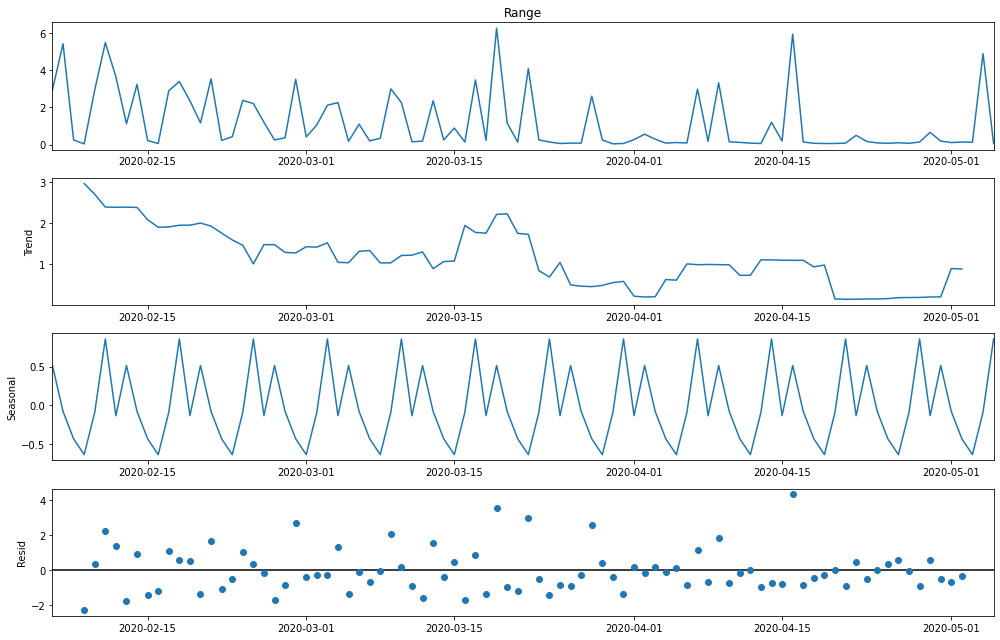

In [49]:
import statsmodels.api as sm
from matplotlib import pylab
from pylab import *

pylab.rcParams['figure.figsize'] = (14, 9)

res = sm.tsa.seasonal_decompose(df_range['Range'],  model = 'additive')
plt.figsize=(20, 10)
resplot = res.plot()